In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

alphas = np.flip(np.linspace(1,0,20,endpoint=False))
epsilons = np.flip(np.linspace(1,0,21,endpoint=True))
episodes = 1000

rewards_no_decay = np.empty((alphas.shape[0],epsilons.shape[0],episodes),dtype=float)
rewards_decay = np.empty((alphas.shape[0],epsilons.shape[0],episodes),dtype=float)

# retrieving data from file.
loaded_arr = np.loadtxt("rewards_non_decay.txt")
loaded_arr_2 = np.loadtxt("rewards_decaying.txt")

# This loadedArr is a 2D array, therefore
# we need to convert it to the original
# array shape.reshaping to get original
# matrice with original shape.
rewards = loaded_arr.reshape(
   loaded_arr.shape[0], loaded_arr.shape[1] // rewards_no_decay.shape[2], rewards_no_decay.shape[2])
rewards_decay = loaded_arr_2.reshape(
   loaded_arr_2.shape[0], loaded_arr_2.shape[1] // rewards_no_decay.shape[2], rewards_no_decay.shape[2])

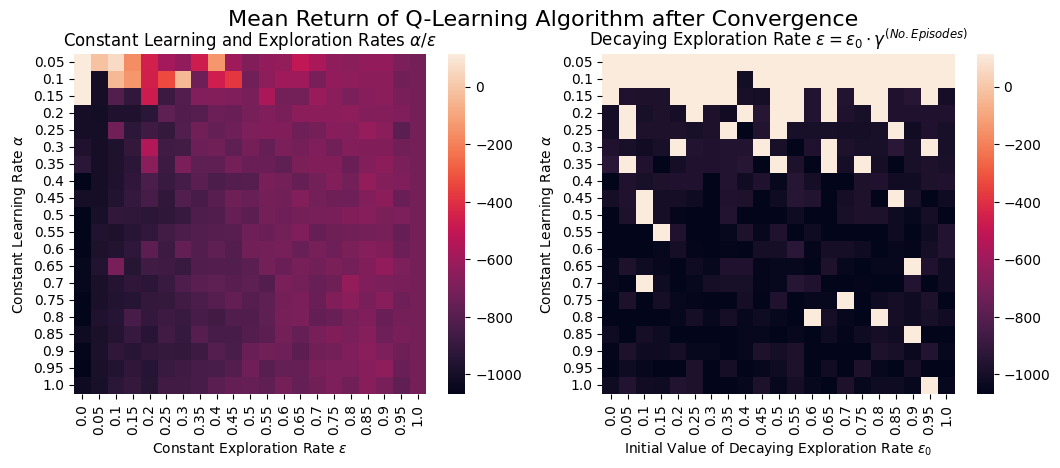

In [31]:
mean_1 = np.empty((alphas.shape[0],epsilons.shape[0]),dtype=float)
mean_2 = np.empty((alphas.shape[0],epsilons.shape[0]),dtype=float)

for ii,alpha in enumerate(alphas):
    for jj,epsilon in enumerate(epsilons):
        mean_1[ii,jj] = np.mean(rewards[ii,jj,-100:])
        mean_2[ii,jj] = np.mean(rewards_decay[ii,jj,-100:])

plt.figure(figsize=(15/1.2,5.3/1.2))
plt.subplot(1,2,1)
s1 = sns.heatmap(mean_1, annot=False, xticklabels=np.round(epsilons,2), yticklabels=np.round(alphas,2))
s1.set(xlabel=r'Constant Exploration Rate $\varepsilon$', ylabel=r'Constant Learning Rate $\alpha$')
plt.title(r'Constant Learning and Exploration Rates $\alpha/\varepsilon$')

plt.subplot(1,2,2)
s2 = sns.heatmap(mean_2, annot=False, xticklabels=np.round(epsilons,2), yticklabels=np.round(alphas,2))
s2.set(xlabel=r'Initial Value of Decaying Exploration Rate $\varepsilon_0$', ylabel=r'Constant Learning Rate $\alpha$')
plt.title(r'Decaying Exploration Rate $\varepsilon=\varepsilon_0\cdot\gamma^{(No. Episodes)}$')
plt.suptitle("Mean Return of Q-Learning Algorithm after Convergence", size=16)
plt.show()

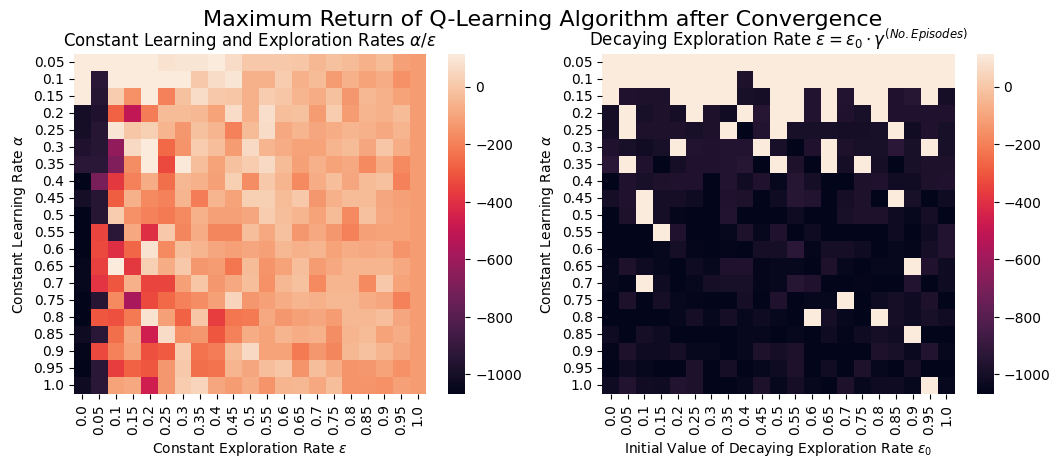

In [35]:
max_1 = np.empty((alphas.shape[0],epsilons.shape[0]),dtype=float)
max_2 = np.empty((alphas.shape[0],epsilons.shape[0]),dtype=float)

for ii,alpha in enumerate(alphas):
    for jj,epsilon in enumerate(epsilons):
        max_1[ii,jj] = np.max(rewards[ii,jj,-100:])
        max_2[ii,jj] = np.max(rewards_decay[ii,jj,-100:])


plt.figure(figsize=(15/1.2,5.3/1.2))
plt.subplot(1,2,1)
s1 = sns.heatmap(max_1, annot=False, xticklabels=np.round(epsilons,2), yticklabels=np.round(alphas,2))
s1.set(xlabel=r'Constant Exploration Rate $\varepsilon$', ylabel=r'Constant Learning Rate $\alpha$')
plt.title(r'Constant Learning and Exploration Rates $\alpha/\varepsilon$')

plt.subplot(1,2,2)
s2 = sns.heatmap(max_2, annot=False, xticklabels=np.round(epsilons,2), yticklabels=np.round(alphas,2))
s2.set(xlabel=r'Initial Value of Decaying Exploration Rate $\varepsilon_0$', ylabel=r'Constant Learning Rate $\alpha$')
plt.title(r'Decaying Exploration Rate $\varepsilon=\varepsilon_0\cdot\gamma^{(No. Episodes)}$')
plt.suptitle("Maximum Return of Q-Learning Algorithm after Convergence", size=16)
plt.show()


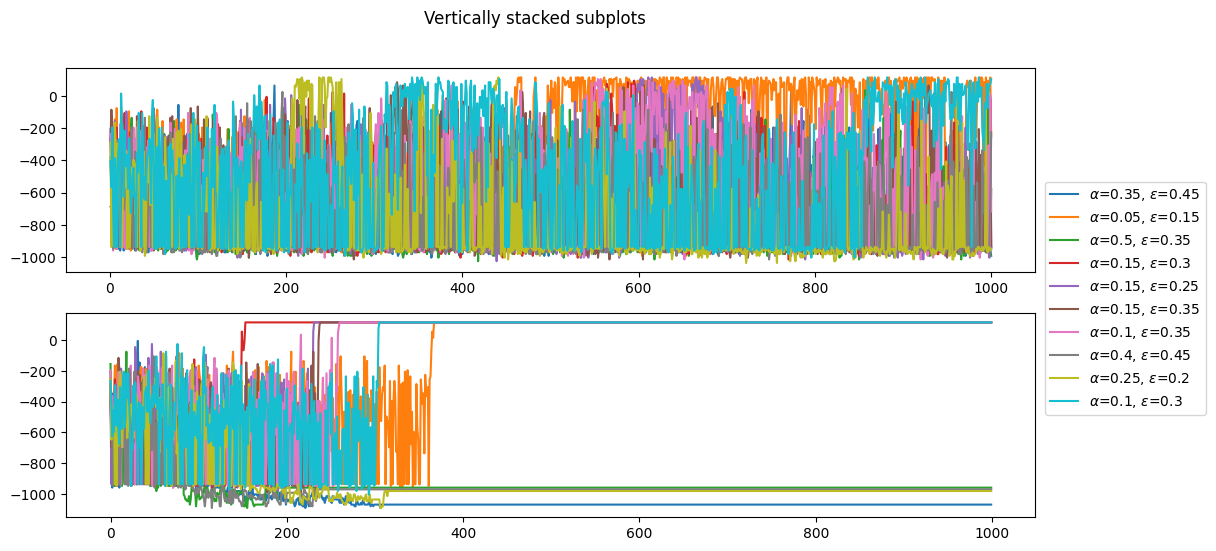

In [119]:
episodes = np.arange(1,1000 + 1)
max_reward = 114 # TODO

fig, axs = plt.subplots(2,1)
fig.set_figheight(7/1.2)
fig.set_figwidth(15/1.2)
fig.suptitle('Vertically stacked subplots')

matplotlib.rc('image', cmap='hot')

plt.subplot(2,1,1)
for _ in range(10):
    ii,jj = np.random.randint(len(alphas)/2,size=(2,))
    label = r'$\alpha$='+str(round(alphas[ii],2))+r', $\varepsilon$='+str(round(epsilons[jj],2))
    axs[0].plot(episodes, rewards[ii,jj,:], label=label)
    axs[1].plot(rewards_decay[ii,jj,:], label=label)

axs[1].legend(loc=(1.01,.5))
plt.show()


(4, 12)